# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Diego Felipe Diaz Perez
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.

<center>

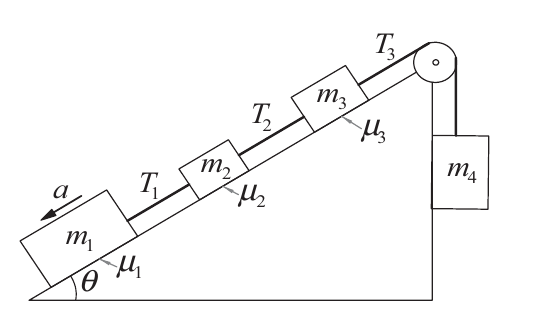

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [2]:
m=np.array([10.,4.,5.,6.])
u=np.array([0.25,0.3,0.2])
o=45
g=9.81
A=np.array([[1,0,0,m[0]],
           [-1,1,0,m[1]],
           [0,-1,1,m[2]],
           [0,0,-1,m[3]]])
b=np.array([m[0]*g*(np.sin(o)-u[0]*np.cos(o)),m[1]*g*(np.sin(o)-u[1]*np.cos(o)),m[2]*g*(np.sin(o)-u[2]*np.cos(0)),-m[3]*g])
s=np.linalg.solve(A,b)
print("T1:",s[0])
print("T2:",s[1])
print("T3:",s[2])
print("a:",s[3])

T1: 42.24519569712331
T2: 58.11259223391225
T3: 75.86695097035133
a: 2.8344918283918883


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

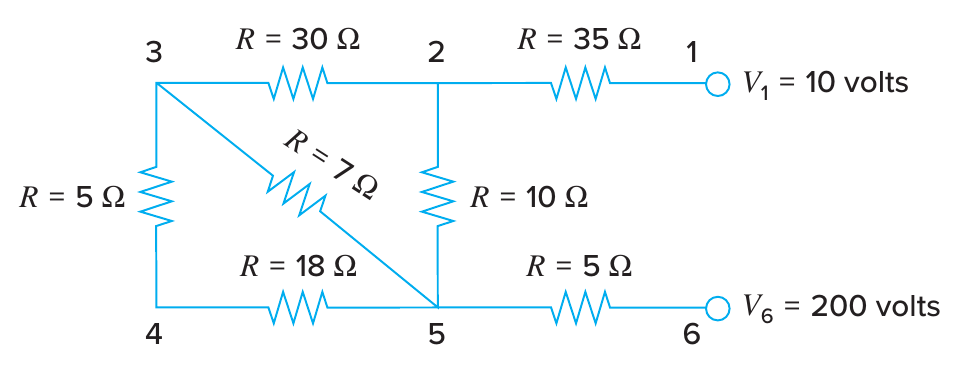


In [3]:
# i12-i23-i25=0
# i23-i34-i35=0
# i34-i45=0
# 125+i35+i45-i56=0
# -35i12-10i25-5i56=-190
# -30i23+10i25-7i35=0
# -5i34+7i35-18i45=0
# hare la matriz con  las incognitas en el siguiente orden: i12,i23,i25,i34,i35,i45,i56
A=np.array([[1,-1,-1,0,0,0,0],
            [0,1,0,-1,-1,0,0],
            [0,0,0,1,0,-1,0],
            [0,0,1,0,1,1,-1],
            [-35,0,-10,0,0,0,-5],
            [0,-30,10,0,-7,0,0],
            [0,0,0,-5,7,-18,0]],dtype=float)
b=np.array([0,0,0,0,-190,0,0])
s=np.linalg.solve(A,b)
print("valores de las corrientes en el orden dado arriba:",s)

valores de las corrientes en el orden dado arriba: [3.97524981 0.87624904 3.09900077 0.20445811 0.67179093 0.20445811
 3.97524981]


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

In [4]:
A=np.array([[2,-1,1],
            [0,3,-1],
            [2,1,3]],dtype=float)
#a
val,u=np.linalg.eig(A)
d=np.diag(val)
print("diagonalizacion de A:",d)

diagonalizacion de A: [[4.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 2.+1.68652966e-08j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 2.-1.68652966e-08j]]


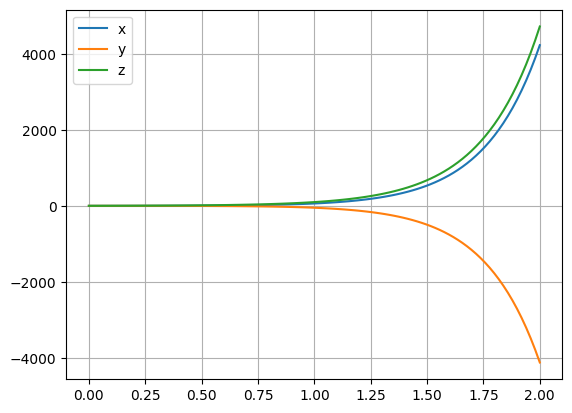

In [5]:
#b y c
r0=np.array([1,1,2],dtype=float)
u_inv=np.linalg.inv(u)
def r(t):
  fd=np.diag(np.exp(val* t))
  r=u@fd@u_inv@r0
  return np.real(r)
t=np.linspace(0,2,100)
r_v= np.array([r(ti) for ti in t])
plt.plot(t,r_v[:,0],label="x")
plt.plot(t,r_v[:,1],label="y")
plt.plot(t,r_v[:,2],label="z")
plt.legend()
plt.grid()

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

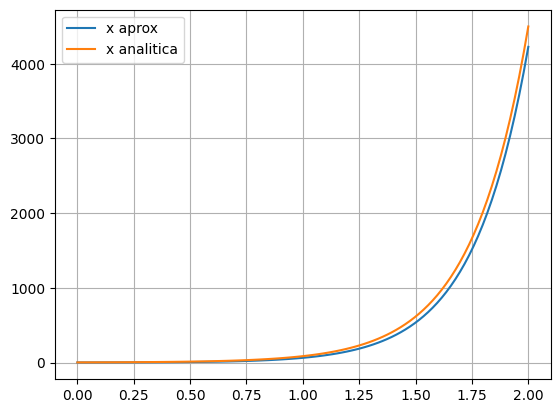

In [6]:
#d
def x(t):
  r=1*(np.exp(2*t)*(1+np.exp(2*t)-2*t))+1*(2*(t+1)*np.exp(2*t))+2*(np.exp(2*t)*(-1+np.exp(2*t)))
  return r/2
def y(t):
  r=1*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t))+1*(2*(t+1)*np.exp(2*t))+2*(-np.exp(2*t)*(-1+np.exp(2*t)))
  return r/2
def z(t):
  r=1*(np.exp(2*t)*(-1+np.exp(2*t)+2*t))+1*(2*t*np.exp(2*t))+2*(np.exp(2*t)*(1+np.exp(2*t)))
  return r/2
t=np.linspace(0,2,100)
plt.plot(t,r_v[:,0],label="x aprox")
plt.plot(t,x(t),label="x analitica")
plt.legend()
plt.grid()

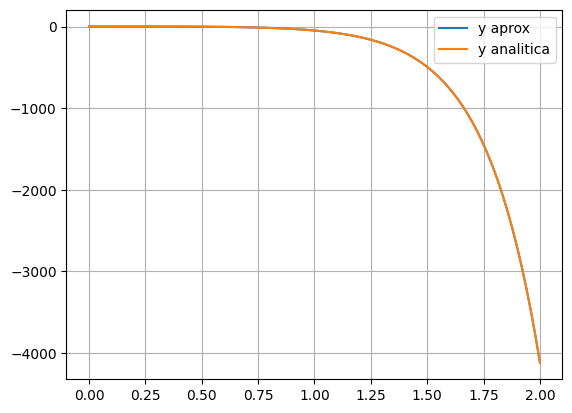

In [7]:
plt.plot(t,r_v[:,1],label="y aprox")
plt.plot(t,y(t),label="y analitica")
plt.legend()
plt.grid()

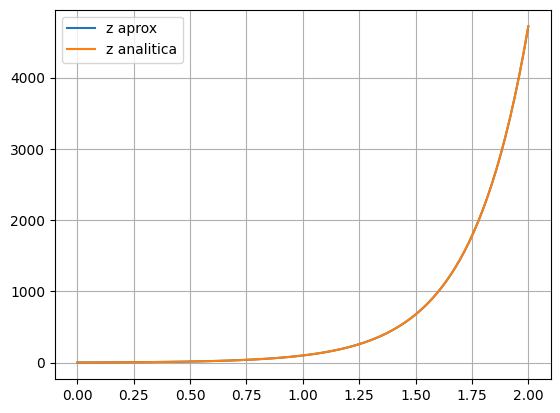

In [8]:
plt.plot(t,r_v[:,2],label="z aprox")
plt.plot(t,z(t),label="z analitica")
plt.legend()
plt.grid()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [9]:
r=2
bz=1e-4
by=0
bx=0
h=1.0545718e-34
i=1+0j
H=(-(r*h)/2)*np.array([[bz,bx-by*i],
                       [bx+i*by,-bz]])
#a
her=np.isclose(H,H.conj().T)
print("¿H es hermitica?:",her)

¿H es hermitica?: [[ True  True]
 [ True  True]]


In [10]:
#b y c
val,vec=np.linalg.eig(H)
nor1=np.linalg.norm(vec[0])
nor2=np.linalg.norm(vec[1])
print("niveles de energia permitidos (valores propios):",val)
print("autovectores:",vec)
print("norma de los autovectores:",nor1,nor2)

niveles de energia permitidos (valores propios): [-1.0545718e-38+0.j  1.0545718e-38-0.j]
autovectores: [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
norma de los autovectores: 1.0 1.0


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

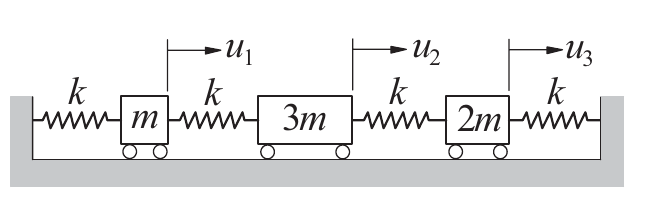
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [19]:
k=1
m=1
#1. -(2k/m)u1+(k/m)u2=du1
#2. (k/3m)u1-(2k/3m)u2+(k/3m)u3=du2
#3. (k/2m)u2-(k/m)u3=du3
A=np.array([[(2*k)/m,-k/m,0],
            [-k/(3*m),(2*k)/(3*m),-k/(3*m)],
            [0,-k/(2*m),k/m]],dtype=float) #multiplico por -1 cambiando los signos para poder hacer la raiz cuadrada a los valores propios
val,vet=np.linalg.eig(A)
w=val**(1/2)
print("w:",w)
print("formas modales:",vet)

w: [1.49429737 0.50281358 1.08670167]
formas modales: [[-0.96983375 -0.42955167 -0.38362421]
 [ 0.22589817 -0.75050344 -0.31421871]
 [-0.0916107  -0.502225    0.86838877]]
